## Project Proposal: Phase 2
### College Demographics and Acceptance Change over Time 


#### Group: Mara Helfer, Catherine McKinley, Shrey Sahni, Holly Soper
#### DS3000

### Central Motivation & Cleaning Explanation

The central motivation of this project is to analyze college enrollment trends, (question one) focusing on the correlation between female and minority enrollment rates, and (question two) the relationship between total enrollment figures and the percentage of public institution enrollment over a certain time frame. Understanding these dynamics can offer insights into broader trends in education accessibility and demographic representation in higher education. The data was collected by scraping College Enrollment & Student Demographic Statistics from relevant websites using an import requests call to access the HTML content.

Once the raw data was retrieved, we used Beautiful Soup to parse and clean the HTML, ensuring that the data was structured correctly for analysis. The key step involved extracting specific rows and columns, which was done by identifying table headers and matching them with the data rows. Additionally, we used soup.find_all() to locate essential sections within the HTML, particularly where more granular data on gender and ethnicity breakdowns was present. For further analysis, we created new data rows by appending calculated statistics to the existing data frame, enabling comparisons and visualizations. This method allowed us to dynamically explore the data by adding relevant metrics to the dataset.

Visualizations were then created to explore the correlation between female and minority enrollment, as well as the relationship between overall enrollment figures and the percentage of students in public colleges. These visualizations helped to identify patterns and possible causal relationships. The data processing pipeline thus ensured clean, structured data ready for in-depth statistical analysis.

### Cleaning and Dataframe Built

In [20]:
# initialize
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

def scrap_table(num):
    # URL of the webpage with the table
    url = "https://educationdata.org/college-enrollment-statistics"
    response = requests.get(url)

    # Parsing the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Finding all the tables
    tables = soup.find_all('table', {'class': 'table-responsive-mobile'})

    #finding 
    ethnic_table = tables[num]

    # Extract the table headers
    headers = [th.text.strip() for th in ethnic_table.find_all('th')]

    # Extract the table rows (skipping the header)
    rows = []
    
    # Skip the header row
    for row in ethnic_table.find_all('tr')[1:]: 
        cells = [cell.text.strip() for cell in row.find_all('td')]
        rows.append(cells)

    # Put into variable
    df = pd.DataFrame(rows, columns=headers)
    
    return df

enrollment_df = scrap_table(0)
merged_df = pd.merge(scrap_table(3), scrap_table(2))
merged_df, enrollment_df

(    Year % Female Enrollment % Female Racial or Ethnic Minority Enrollment  \
 0   2022              57.94%                                        27.19%   
 1   2021              58.37%                                        26.91%   
 2   2020              58.56%                                        26.80%   
 3   2019              57.39%                                        25.89%   
 4   2018              57.03%                                        25.21%   
 5   2017              56.66%                                        24.64%   
 6   2016              56.47%                                        24.11%   
 7   2015              56.36%                                        23.71%   
 8   2014              56.47%                                        23.45%   
 9   2010              56.96%                                        21.55%   
 10  2000              56.10%                                        16.53%   
 11  1990              54.28%                       

### Visualization 1

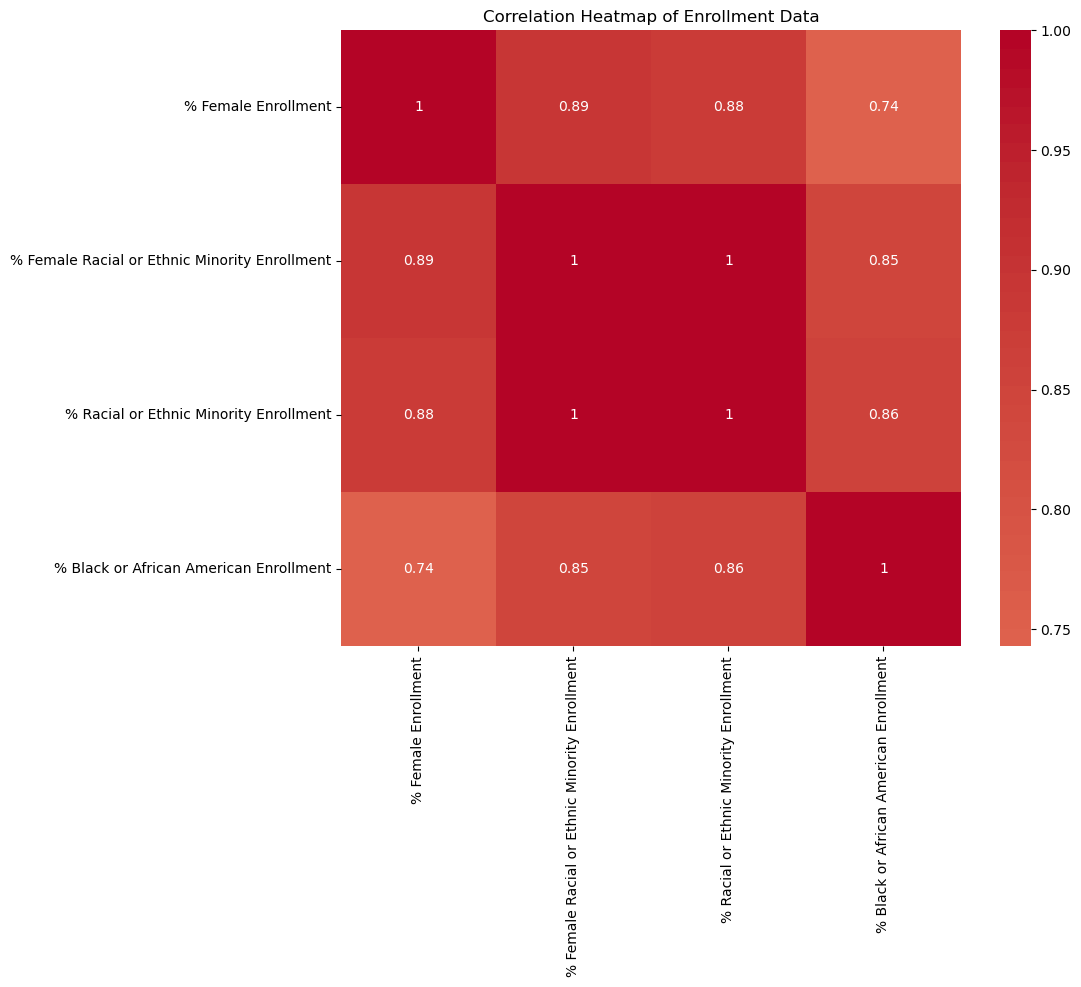

In [21]:
# Remove '%' symbols and convert to float for all relevant columns
for col in merged_df.columns[1:]:
    merged_df[col] = merged_df[col].str.replace('%', '').astype(float)

# Compute the correlation matrix
corr_matrix = merged_df.drop(columns=['Year']).corr()


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Enrollment Data')
plt.show()

### Visualization 2

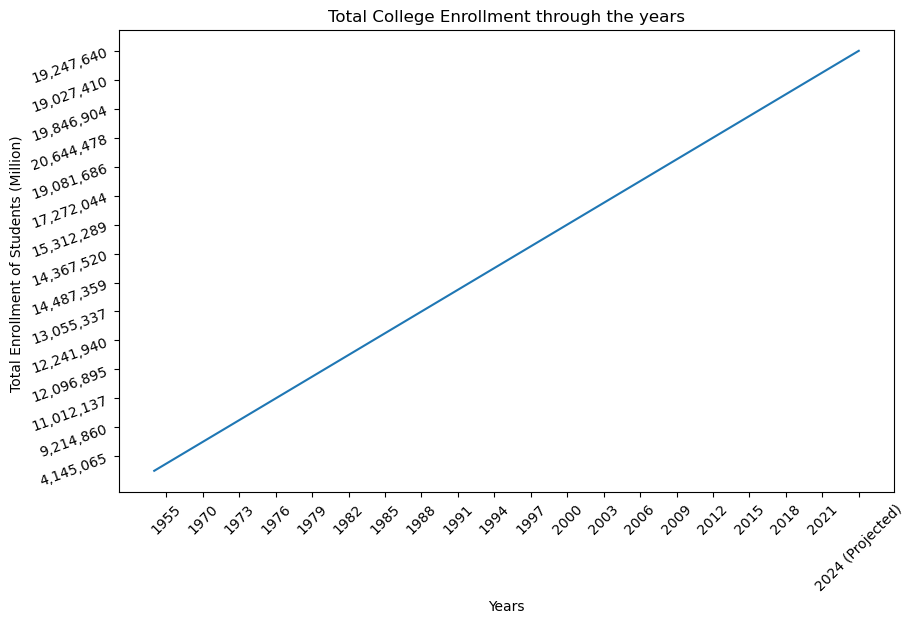

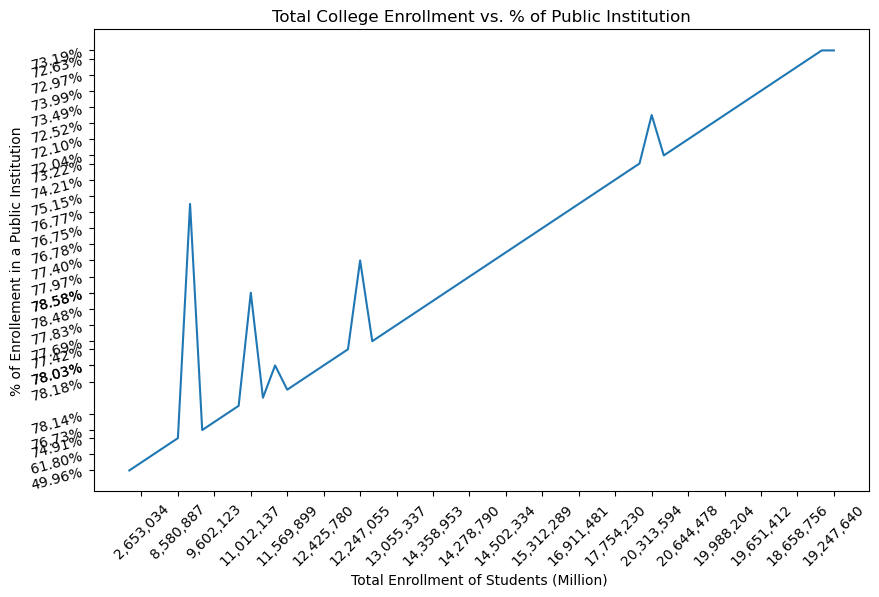

In [23]:
# year vs. Total College Student Enrollment
x = enrollment_df['Year']
y = enrollment_df['Total Enrollment']
plt.figure(figsize=(10, 6))
plt.plot(x, y)

# labels
plt.xlabel("Years")
plt.ylabel("Total Enrollment of Students (Million) ")
plt.title("Total College Enrollment through the years")

# Invert Data to make more sense because data origionally displayed non-chronologically
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Rotate x-axis labels and limit the number of words
plt.xticks(ticks=x[::3], rotation=45)
plt.yticks(ticks=y[::4], rotation=20)
plt.show()

# Enrollment vs. % of Public Institution Enrollment 
x = enrollment_df['Total Enrollment']
y = enrollment_df['% Public Institution Enrollment']
plt.figure(figsize=(10, 6))
plt.plot(x, y)

# labels
plt.xlabel("Total Enrollment of Students (Million) ")
plt.ylabel("% of Enrollement in a Public Institution")
plt.title("Total College Enrollment vs. % of Public Institution")

# Invert Data to make more sense because data origionally displayed non-chronologically
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Rotate x-axis labels and limit the number of words
plt.xticks(ticks=x[::3], rotation=45)
plt.yticks(ticks=y[::2], rotation=15)
plt.show()